# Optimization results for the Power series, Fourier series and Gaussian superposition pulses

In [ ]:
# !pip install uncertainties
# !pip install quantum_gates

In [ ]:
# !pip install pandas>= 1.4.0

## Imports

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
def set_matplotlib_style(overwrite: dict={}):
    """Sets the rc parameters to pre-defined values.

    Use the overwrite lookup to overwrite the default behaviour.

    Args:
        overwrite (dict): Lookup table which can be used to overwrite the default values.
    """
    plt.rcParams.update({
        "axes.titlesize": 16,
        "axes.labelsize": 12,
        "lines.linewidth": 1.5,
        "lines.markersize": 5,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": "medium",
        "figure.figsize": (8, 6),
    })

    # Plot background -> white inside, transparent outside
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
        "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
    })

    # Plot error bars
    plt.rcParams.update({
        "errorbar.capsize":  8,  # Length of the error bar caps
    })

    # Overwrite default behaviour
    if isinstance(overwrite, dict) and len(overwrite) > 0:
        plt.rcParams.update(overwrite)
    return


def activate_latex(preamble_list: list[str]=[]):
    """Activates LaTeX for use in Matplotlib and import some packages.

    Imported packages include amsmath, amssymb, and braket.

    Examples:
        preamble_list = ['\\usepackage{myfancypackage}'] where the string has an r as prefix.

    Args:
        preample_list (list[str]): List of raw str that represent the lines of the LaTeX preample used for imports.
    """

    pgf_with_latex = {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
        "text.latex.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage{amsmath}",
            r"\usepackage{amssymb}",
            r"\usepackage{braket}",
        ] + preamble_list)
    }
    mpl.rcParams.update(pgf_with_latex)
    return

In [ ]:
set_matplotlib_style()

## Paths

In [ ]:
rel_folder = "../../results/integrals"
plot_folder = "../../plots/integrals"

In [ ]:
import os

def create_folder(path):
    folders = path.split('/')
    current_path = ''
    for folder in folders:
        current_path += folder + '/'
        if not os.path.exists(current_path):
            os.makedirs(current_path)

## Settings

In [ ]:
# theta = 0.785398
# theta_str = "pi quarter"
# theta = 1.570796
# theta_str = "pi half"
# theta = 2.356194
# theta_str = "pi three quarter"
theta = 3.141592
theta_str = "pi"

## Data loading 

In [28]:
runs = [
        'power_extended_constrained',
        'fourier_extended_constrained',
        'gaussian_extended_constrained'
]
pd_lookup = {
    run: pd.read_csv(f"{rel_folder}/{run}/results.csv") for run in runs
}
pd_lookup

{'power_extended_constrained':                    config.name  \
 0   power_extended_constrained   
 1   power_extended_constrained   
 2   power_extended_constrained   
 3   power_extended_constrained   
 4   power_extended_constrained   
 ..                         ...   
 67  power_extended_constrained   
 68  power_extended_constrained   
 69  power_extended_constrained   
 70  power_extended_constrained   
 71  power_extended_constrained   
 
                                    config.description config.content.factory  \
 0   Configuration to test the Power Pulses with co...           PowerFactory   
 1   Configuration to test the Power Pulses with co...           PowerFactory   
 2   Configuration to test the Power Pulses with co...           PowerFactory   
 3   Configuration to test the Power Pulses with co...           PowerFactory   
 4   Configuration to test the Power Pulses with co...           PowerFactory   
 ..                                                ...        

In [ ]:
# Query dfs to only contain rows for certain theta value
pd_lookup = {
    run: df.loc[abs(df['args.theta'] - theta) <= 1e-1] for run, df in pd_lookup.items()
}

In [ ]:
pd_lookup["power_extended_constrained"].head()

In [ ]:
pd_lookup["fourier_extended_constrained"].head()

In [ ]:
pd_lookup["gaussian_extended_constrained"].head()

## Visualize final loss for different number of basis functions



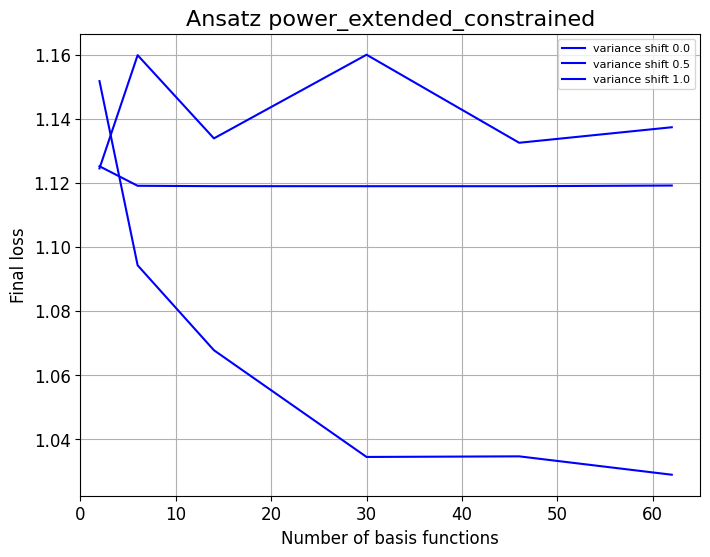

In [22]:
# Plot loss of Power series ansatz

def plot_fun(df0: pd.DataFrame, ansatz: str, file_prefix: str=""):
    markers = ["-b", "-g", "-r", "-k", "-y", ]
    query_arg = "scale" if "gaussian" in ansatz else "shift"

    plt.figure()

    for weights, marker in zip(df0['args.weights'].unique(), markers):
        for name, df in df0.groupby(f'args.{query_arg}'):
            x = df[df['args.weights'] == weights]['args.n']
            y = df[df['args.weights'] == weights]['results.fun']
            # Todo: Transform x to n depending on the ansatz
            # Sort (x,y) according to n
            if "power" in ansatz:
                x = x + 1 - 3
            if "fourier" in ansatz:
                x = 2 * (x+1) - 3
            if "gaussian" in ansatz:
                x = x - 3

            x, y = zip(*sorted(zip(x,y), key=lambda z: z[0]))
            plt.plot(x, y, marker, label=f'{weights} {query_arg} {name}')

    # Formatting
    plt.xlim(0)
    plt.xlabel("Number of basis functions")
    plt.ylabel("Final loss")
    plt.title(f"Ansatz {ansatz}")
    plt.grid()
    plt.legend(fontsize="8")

    # Save
    folder = f"../../plots/integrals/{ansatz}"
    if not os.path.isdir(folder):
        os.mkdir(folder)
    plt.savefig(f"{folder}/{file_prefix}_{ansatz}_convergence.pdf")
    plt.show()


plot_fun(
    df0=pd_lookup["power_extended_constrained"],
    ansatz="power_extended_constrained",
)

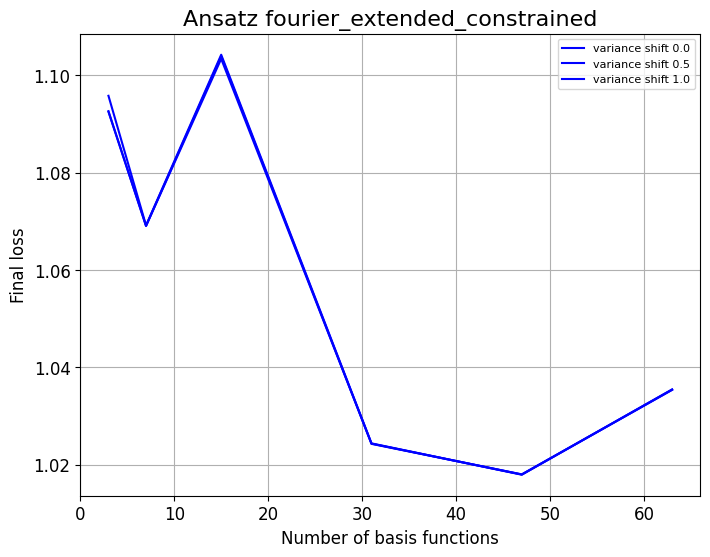

In [23]:
plot_fun(
    df0=pd_lookup["fourier_extended_constrained"],
    ansatz="fourier_extended_constrained",
)

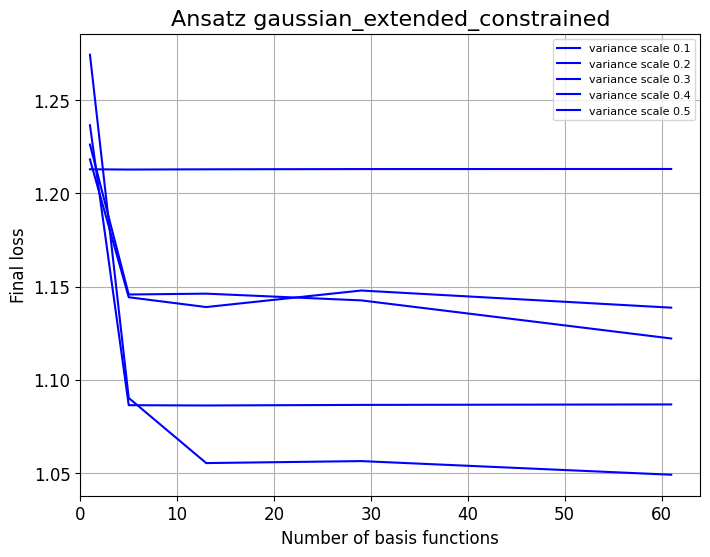

In [24]:
plot_fun(
    df0=pd_lookup["gaussian_extended_constrained"],
    ansatz="gaussian_extended_constrained",

)

In [ ]:
def plot_fun_just_variance(df0: pd.DataFrame, ansatz: str):

    query_arg = "scale" if "gaussian" in ansatz else "shift"
    plt.figure()
    for name, df in df0.groupby(f'args.{query_arg}'):
        x = df[df['args.weights'] == 'variance']['args.n']
        y = df[df['args.weights'] == 'variance']['results.fun']
        # Todo: Transform x to n depending on the ansatz
        # Sort (x,y) according to n
        if "power" in ansatz:
            x = x + 1 - 3
        if "fourier" in ansatz:
            x = 2 * (x+1) - 3
        if "gaussian" in ansatz:
            x = x - 3

        x, y = zip(*sorted(zip(x,y), key=lambda z: z[0]))
        plt.plot(x, y, label=f'{query_arg} {name}')

    # Formatting
    plt.xlim(0)
    plt.xlabel("Number of basis functions")
    plt.ylabel("Final variance loss")
    plt.title(f"Ansatz {ansatz}")
    plt.grid()
    plt.legend(fontsize="8")

    # Save
    folder = f"../../plots/integrals/{ansatz}"
    if not os.path.isdir(folder):
        os.mkdir(folder)
    plt.savefig(f"{folder}/{ansatz}_convergence_variance_only.pdf")
    plt.show()

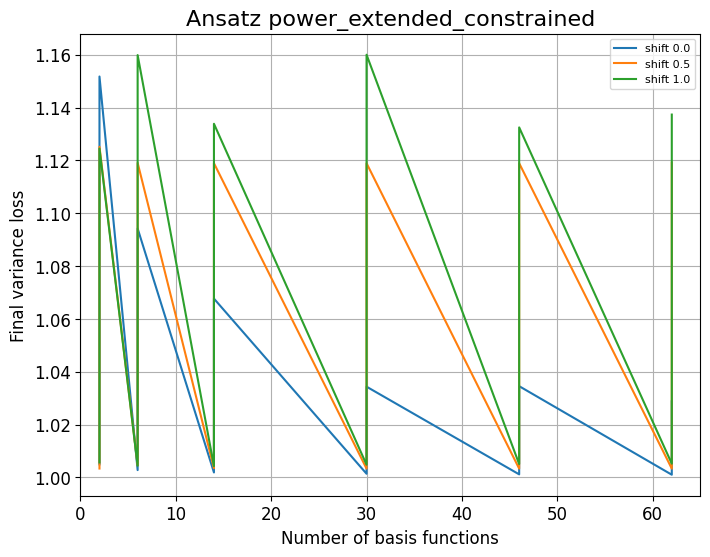

In [30]:
# Just variance
plot_fun_just_variance(
    df0=pd_lookup["power_extended_constrained"],
    ansatz="power_extended_constrained",
)


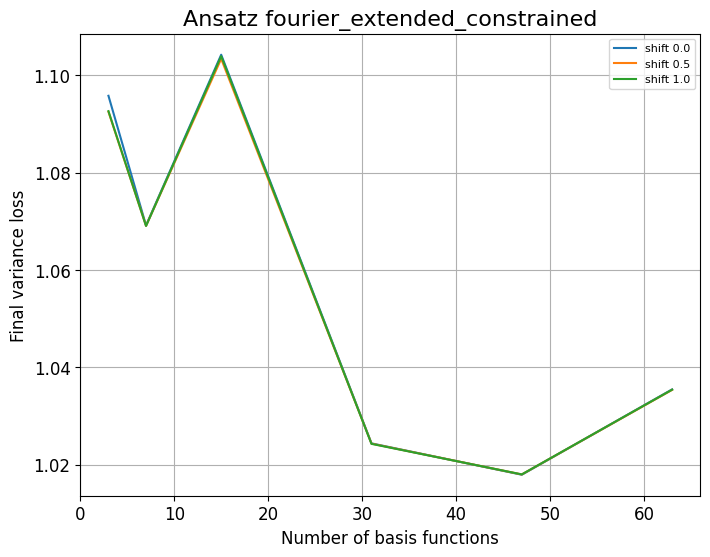

In [26]:
# Just variance
plot_fun_just_variance(
    df0=pd_lookup["fourier_extended_constrained"],
    ansatz="fourier_extended_constrained",
)


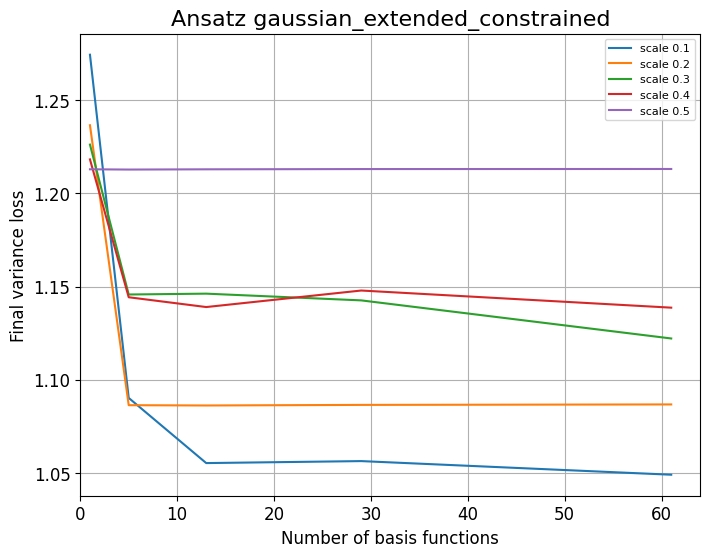

In [27]:
# Just variance
plot_fun_just_variance(
    df0=pd_lookup["gaussian_extended_constrained"],
    ansatz="gaussian_extended_constrained",
)